## Goal
This analysis seeks to compare the performance of various team-level predictors of Points Per Match (PPM) across the five major European football leagues. By examining the strength of correlations between metrics like 'Goals For', 'Possession', and 'Total Passes Into Final Third', I aim to identify league-specific trends that may reflect the underlying tactical approaches in these leagues. Ultimately, the goal is to understand how the style of play in each league influences which metrics are most predictive of team success.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
players = pd.read_csv("C:/Users/scalv/OneDrive/Documents/PythonCourse/FinalProject/Big5_Players_2019_2024.csv")
teams = pd.read_csv("C:/Users/scalv/OneDrive/Documents/PythonCourse/FinalProject/Big5_Teams_2019_2024.csv")
players.head()
teams.head()

,Rk,Player,KP,Season,Age,Nation,Team,Comp,MP,Min,...,Short_Att,Short_Cmp%,Medium_Cmp,Medium_Att,Medium_Cmp%,Long_Cmp,Long_Att,Long_Cmp%,Pos,-9999
0,1,Kevin De Bruyne,136.0,2019-2020,28.0,be BEL,Manchester City,eng Premier League,35,2791.0,...,932.0,85.7,592.0,781.0,75.8,210.0,372.0,56.5,MF,e46012d4
1,2,Kevin Stöger,127.0,2023-2024,29.0,at AUT,Bochum,de Bundesliga,32,2668.0,...,760.0,79.5,508.0,711.0,71.4,208.0,415.0,50.1,MF,e5649a78
2,3,Benjamin Bourigeaud,122.0,2021-2022,27.0,fr FRA,Rennes,fr Ligue 1,38,3193.0,...,690.0,83.5,541.0,695.0,77.8,223.0,430.0,51.9,FWMF,20e73fac
3,4,Bruno Fernandes,119.0,2022-2023,27.0,pt POR,Manchester Utd,eng Premier League,37,3316.0,...,897.0,85.5,495.0,633.0,78.2,181.0,331.0,54.7,MFFW,507c7bdf
4,5,Bruno Fernandes,114.0,2023-2024,28.0,pt POR,Manchester Utd,eng Premier League,35,3118.0,...,876.0,87.4,532.0,698.0,76.2,229.0,432.0,53.0,MFFW,507c7bdf


,Rk,Season,Team,Comp,W,MP,W.1,D,L,Pts,...,GF,GA,GD,Poss,CS,CS%,G-PK,PK,PKatt,PKm
0,1,2019-2020,Liverpool,eng Premier League,32,38,32,3,3,99,...,85,33,52,62.9,15,39.5,78,5,5,0
1,2,2023-2024,Inter,it Serie A,29,38,29,7,2,94,...,89,22,67,57.1,21,55.3,74,13,14,1
2,3,2023-2024,Real Madrid,es La Liga,29,38,29,8,1,95,...,87,26,61,59.2,21,55.3,83,2,5,3
3,4,2021-2022,Manchester City,eng Premier League,29,38,29,6,3,93,...,99,26,73,67.9,21,55.3,89,7,9,2
4,5,2023-2024,Arsenal,eng Premier League,28,38,28,5,5,89,...,91,29,62,58.2,18,47.4,76,10,10,0


In [5]:
# Making a Points per Match Column to Normalize 'Pts' since leagues have different # of matches
teams['PPM'] = teams['Pts'] / teams['MP']


# Aggregate player stats at the team level
team_aggregated = players.groupby("Team").agg({
    "KP": "sum",
    "Total_Cmp": "sum",
    "Total_Att": "sum",  
    "Total_PassIntoFinalThird": "sum"
}).reset_index()


df = teams.merge(team_aggregated, on="Team", how="left")
df['PassCmp%'] = df['Total_Cmp']/df['Total_Att']
df.head()


,Rk,Season,Team,Comp,W,MP,W.1,D,L,Pts,...,G-PK,PK,PKatt,PKm,PPM,KP,Total_Cmp,Total_Att,Total_PassIntoFinalThird,PassCmp%
0,1,2019-2020,Liverpool,eng Premier League,32,38,32,3,3,99,...,78,5,5,0,2.605263,2458.0,97328.0,117607.0,8250.0,0.827570
1,2,2023-2024,Inter,it Serie A,29,38,29,7,2,94,...,74,13,14,1,2.473684,2168.0,81467.0,96839.0,6397.0,0.841262
2,3,2023-2024,Real Madrid,es La Liga,29,38,29,8,1,95,...,83,2,5,3,2.500000,2370.0,99581.0,114464.0,8221.0,0.869977
3,4,2021-2022,Manchester City,eng Premier League,29,38,29,6,3,93,...,89,7,9,2,2.447368,2480.0,112507.0,128089.0,9139.0,0.878350
4,5,2023-2024,Arsenal,eng Premier League,28,38,28,5,5,89,...,76,10,10,0,2.342105,1924.0,78874.0,94576.0,6493.0,0.833975


PPM                                                    \
                    count      mean       std       min       25%       50%   
Comp                                                                          
de Bundesliga        90.0  1.376471  0.455116  0.470588  1.036765  1.294118   
eng Premier League  100.0  1.386316  0.477507  0.421053  1.046053  1.342105   
es La Liga          100.0  1.362895  0.443313  0.552632  1.052632  1.250000   
fr Ligue 1           98.0  1.372913  0.432453  0.464286  1.073308  1.360681   
it Serie A          100.0  1.370789  0.488459  0.447368  0.993421  1.289474   

                                        
                         75%       max  
Comp                                    
de Bundesliga       1.727941  2.647059  
eng Premier League  1.671053  2.605263  
es La Liga          1.611842  2.500000  
fr Ligue 1          1.631579  2.518519  
it Serie A          1.750000  2.473684

ANOVA F-statistic: 0.0345
ANOVA p-value: 0.9977
No significant difference in Points Per Match (PPM) between leagues.


<Figure size 1000x600 with 0 Axes>

C:\Users\scalv\AppData\Local\Temp\ipykernel_16420\1139206251.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Comp', y='PPM', data=df, palette='coolwarm')


<Axes: xlabel='Comp', ylabel='PPM'>

Text(0.5, 0, 'League')

Text(0, 0.5, 'Points Per Match (PPM)')

Text(0.5, 1.0, 'Distribution of PPM Across Leagues')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'eng Premier League'),
  Text(1, 0, 'it Serie A'),
  Text(2, 0, 'es La Liga'),
  Text(3, 0, 'de Bundesliga'),
  Text(4, 0, 'fr Ligue 1')])

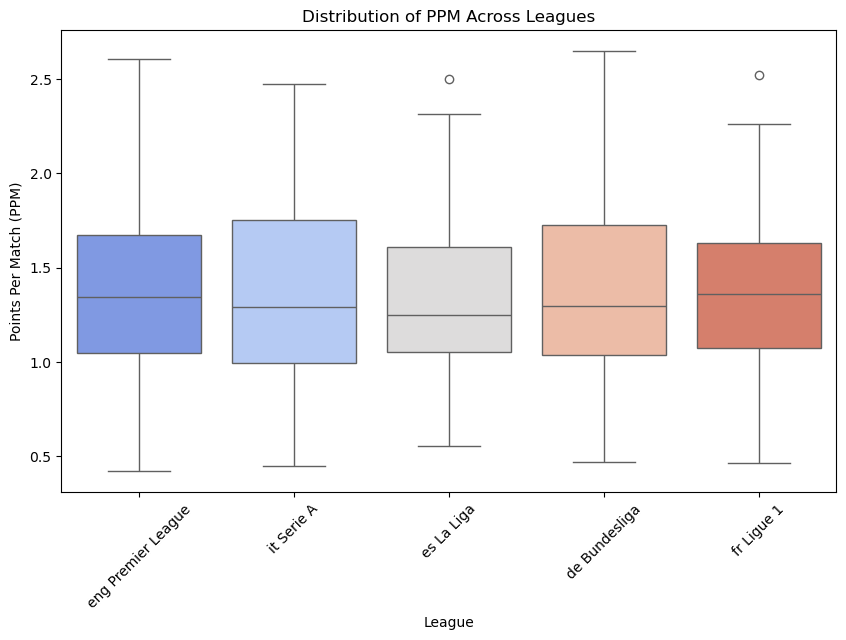

In [7]:
# Are there difference in PPM across leagues?
# One-way ANOVA model

import scipy.stats as stats
df.groupby('Comp')[['PPM']].describe()

# Run ANOVA: Group PPM by league
league_groups = [group['PPM'].dropna() for _, group in df.groupby('Comp')]
anova_result = stats.f_oneway(*league_groups)


print(f"ANOVA F-statistic: {anova_result.statistic:.4f}")
print(f"ANOVA p-value: {anova_result.pvalue:.4f}")

# Interpretation
alpha = 0.05  
if anova_result.pvalue < alpha:
    print("There is a significant difference in Points Per Match (PPM) between leagues.")
else:
    print("No significant difference in Points Per Match (PPM) between leagues.")


plt.figure(figsize=(10,6))
sns.boxplot(x='Comp', y='PPM', data=df, palette='coolwarm')
plt.xlabel("League")
plt.ylabel("Points Per Match (PPM)")
plt.title("Distribution of PPM Across Leagues")
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - All Competitions')

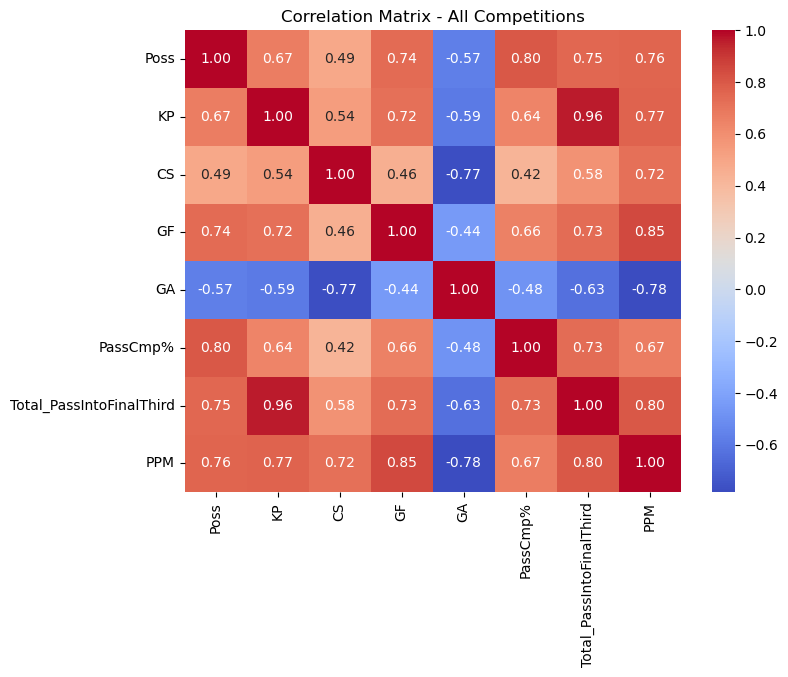

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - de Bundesliga')

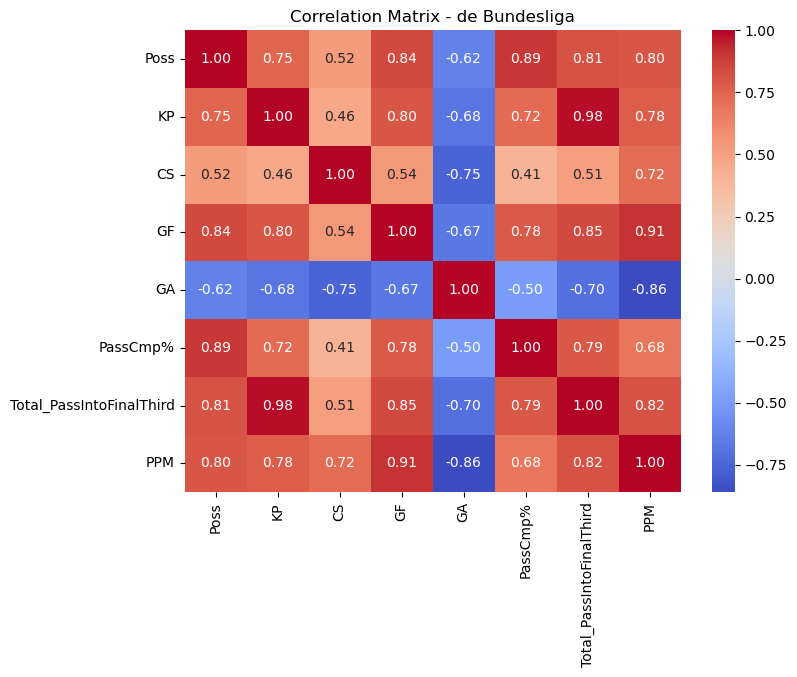

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - eng Premier League')

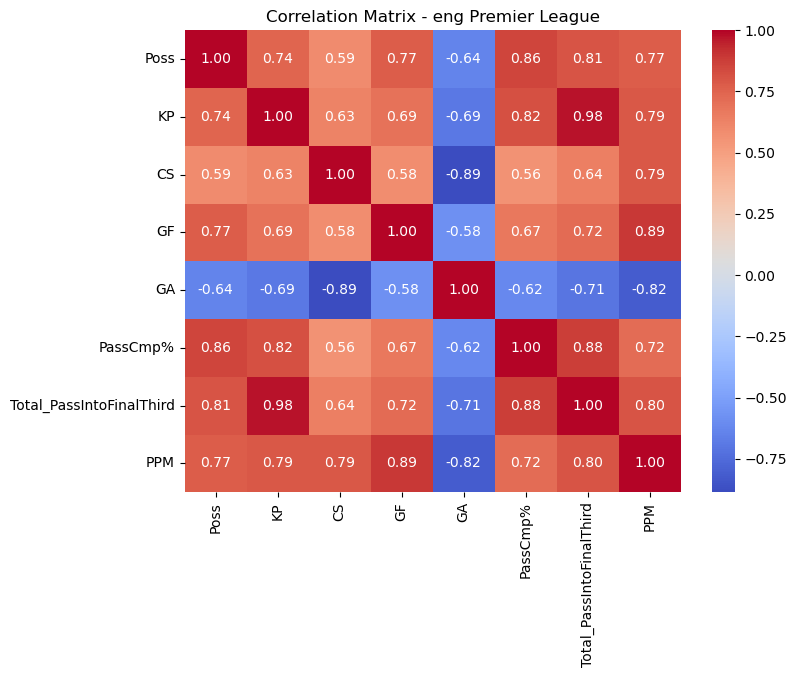

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - es La Liga')

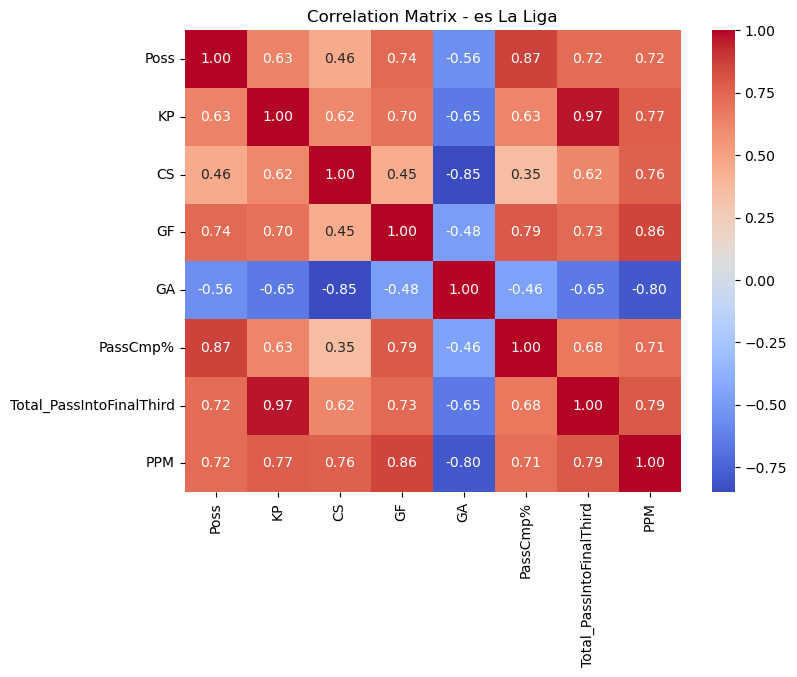

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - fr Ligue 1')

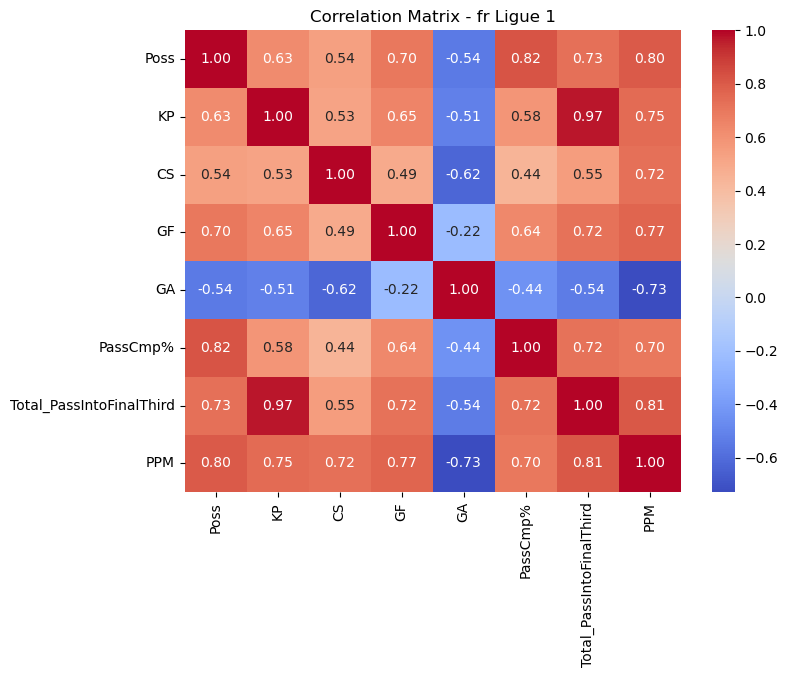

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix - it Serie A')

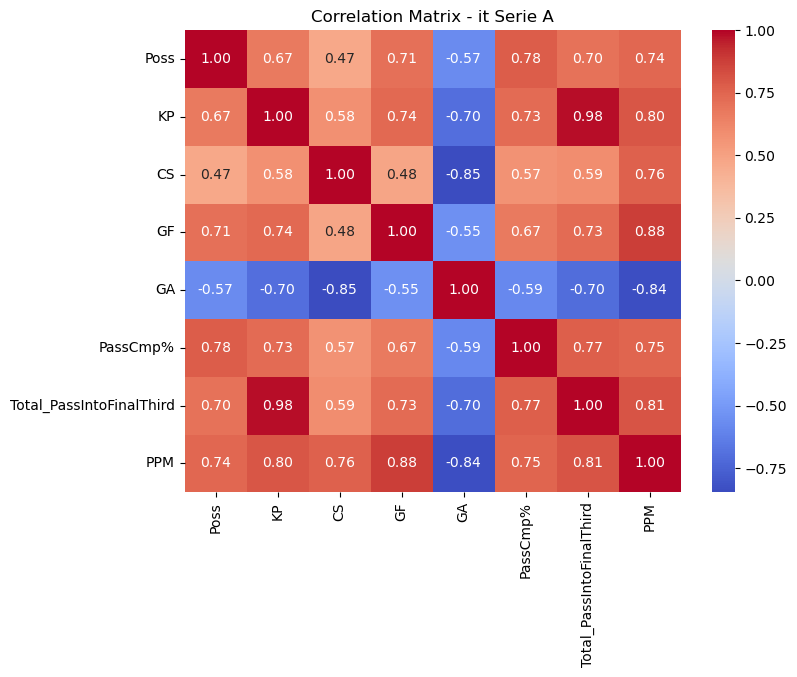

In [9]:
features = ['Poss', 'KP', 'CS', 'GF', 'GA', 'PassCmp%', 'Total_PassIntoFinalThird']
target = 'PPM'


corr_matrix = df[features + [target]].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - All Competitions")
plt.show()

# Compute and plot correlation matrices for each competition
for comp, group in df.groupby("Comp"):
    comp_corr_matrix = group[features + [target]].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(comp_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix - {comp}")
    plt.show()


<Axes: xlabel='GF', ylabel='PPM'>

Text(25, 2.6470588235294117, 'PPM = 0.121 + 0.0234 * GF\n$R^2$ = 0.832')

Text(0.5, 0, 'GF')

Text(0, 0.5, 'PPM')

Text(0.5, 1.0, 'Regression for de Bundesliga')

<Axes: xlabel='GF', ylabel='PPM'>

Text(20, 2.6052631578947367, 'PPM = 0.119 + 0.0232 * GF\n$R^2$ = 0.795')

Text(0.5, 0, 'GF')

Text(0, 0.5, 'PPM')

Text(0.5, 1.0, 'Regression for eng Premier League')

<Axes: xlabel='GF', ylabel='PPM'>

Text(26, 2.5, 'PPM = 0.112 + 0.0260 * GF\n$R^2$ = 0.742')

Text(0.5, 0, 'GF')

Text(0, 0.5, 'PPM')

Text(0.5, 1.0, 'Regression for es La Liga')

<Axes: xlabel='Total_PassIntoFinalThird', ylabel='PPM'>

Text(719.0, 2.5185185185185186, 'PPM = 0.463 + 0.0002 * Total_PassIntoFinalThird\n$R^2$ = 0.654')

Text(0.5, 0, 'Total_PassIntoFinalThird')

Text(0, 0.5, 'PPM')

Text(0.5, 1.0, 'Regression for fr Ligue 1')

<Axes: xlabel='GF', ylabel='PPM'>

Text(24, 2.473684210526316, 'PPM = -0.041 + 0.0263 * GF\n$R^2$ = 0.781')

Text(0.5, 0, 'GF')

Text(0, 0.5, 'PPM')

Text(0.5, 1.0, 'Regression for it Serie A')

<Axes: xlabel='GF', ylabel='PPM'>

Text(20, 2.6470588235294117, 'PPM = 0.171 + 0.0233 * GF\n$R^2$ = 0.728')

Text(0.5, 0, 'GF')

Text(0, 0.5, 'PPM')

Text(0.5, 1.0, 'Regression for All Competitions')

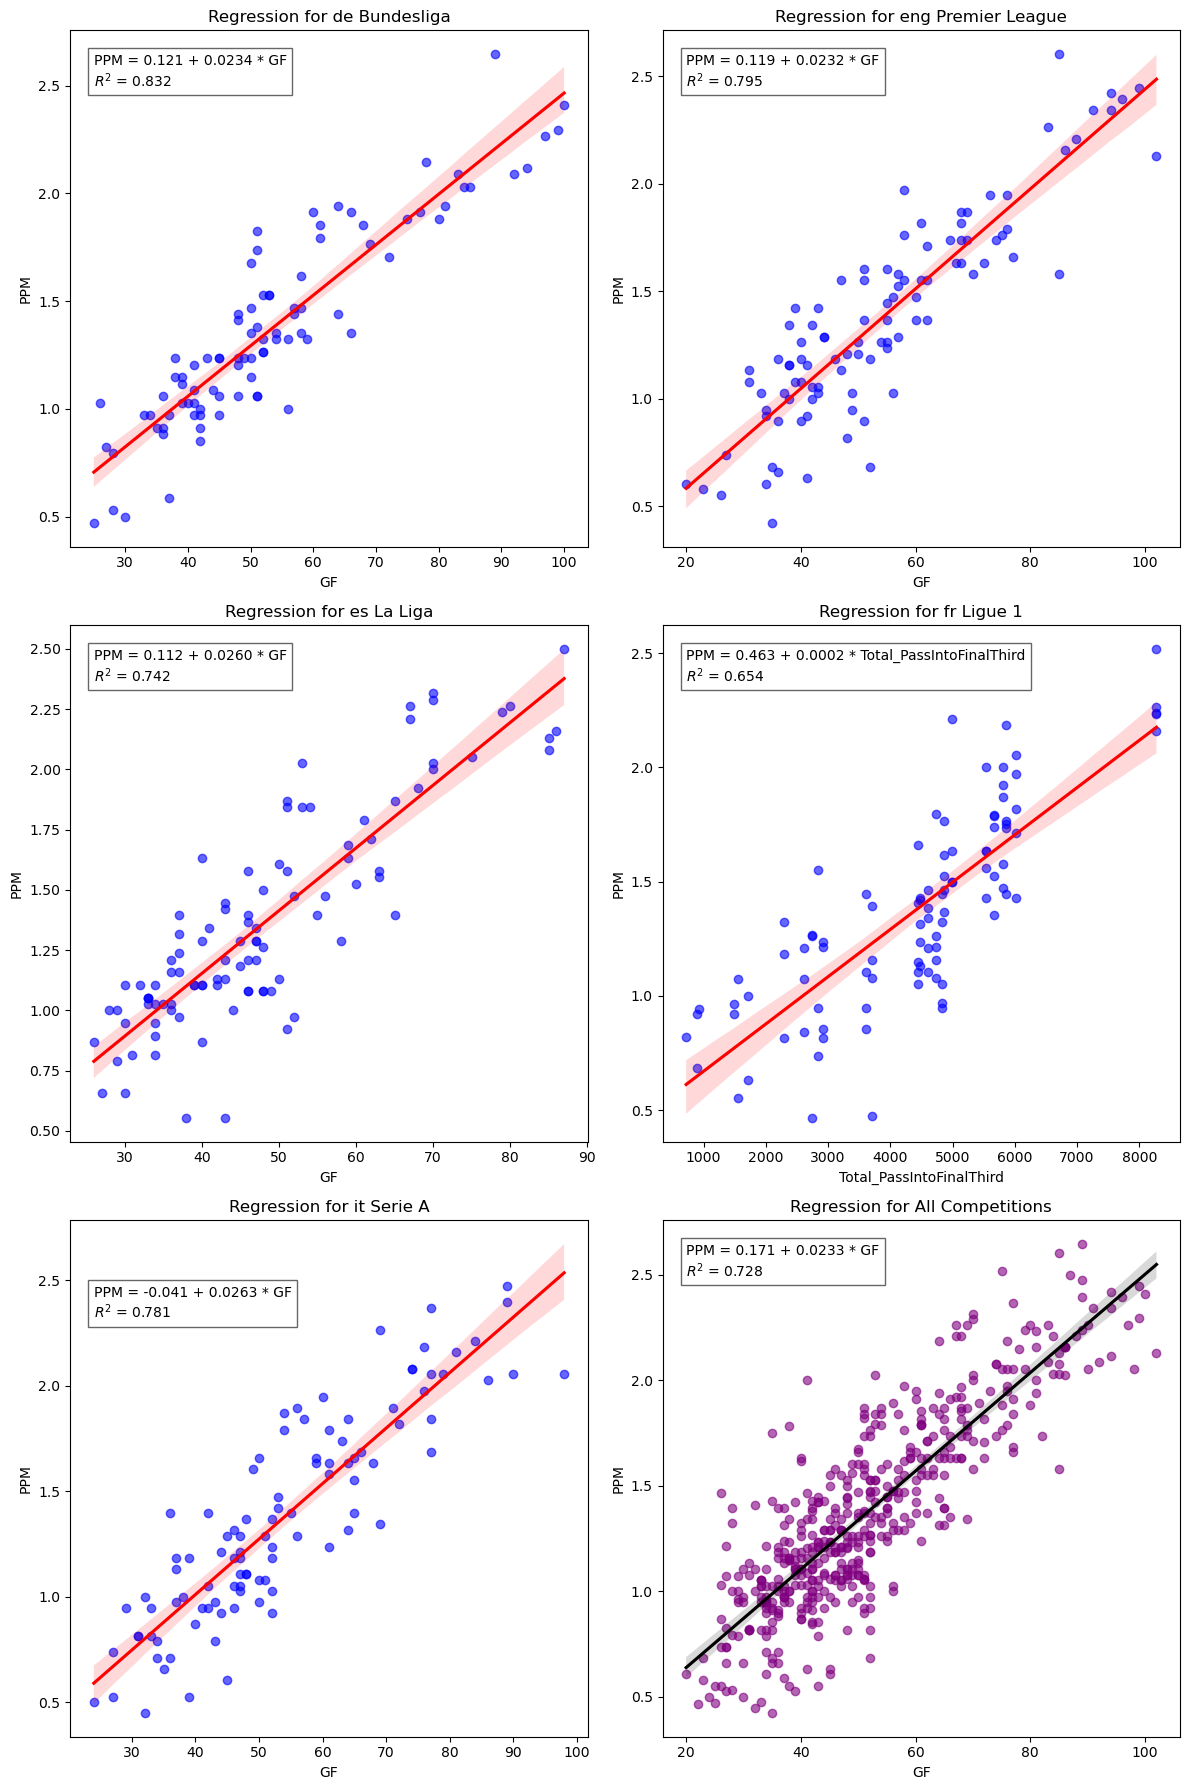

In [11]:
features = ['Poss', 'KP', 'CS', 'GF', 'GA', 'PassCmp%', 'Total_PassIntoFinalThird']
target = 'PPM'


comps = df["Comp"].unique()
num_comps = len(comps)

# Compute the best overall feature (most correlated with PPM in full dataset)
corr_values_all = df[features + [target]].corr()[target].drop(target)
best_feature_all = corr_values_all.abs().idxmax()  


cols = 2  
rows = int(np.ceil((num_comps + 1) / cols))  
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))  
axes = axes.flatten() 


for i, (comp, group) in enumerate(df.groupby("Comp")):
    corr_values = group[features + [target]].corr()[target].drop(target)  
    best_feature = corr_values.abs().idxmax()  

    
    X = sm.add_constant(group[[best_feature]])  # Include intercept
    y = group[target]
    model = sm.OLS(y, X).fit()
    
    
    intercept, slope = model.params  
    r_squared = model.rsquared       

    
    ax = axes[i]
    sns.regplot(x=best_feature, y=target, data=group, scatter_kws={"color": "blue", "alpha": 0.6}, 
                line_kws={"color": "red"}, ax=ax)

    
    eq_text = f"PPM = {intercept:.3f} + {slope:.4f} * {best_feature}\n$R^2$ = {r_squared:.3f}"
    ax.text(x=group[best_feature].min(), y=group[target].max(), 
            s=eq_text, fontsize=10, color="black",
            bbox=dict(facecolor="white", alpha=0.6), verticalalignment='top')

    
    ax.set_xlabel(best_feature)
    ax.set_ylabel("PPM")
    ax.set_title(f"Regression for {comp}")


X_all = sm.add_constant(df[[best_feature_all]])  
y_all = df[target]
model_all = sm.OLS(y_all, X_all).fit()
intercept_all, slope_all = model_all.params  
r_squared_all = model_all.rsquared       


ax = axes[num_comps]
sns.regplot(x=best_feature_all, y=target, data=df, scatter_kws={"color": "purple", "alpha": 0.6}, 
            line_kws={"color": "black"}, ax=ax)


eq_text_all = f"PPM = {intercept_all:.3f} + {slope_all:.4f} * {best_feature_all}\n$R^2$ = {r_squared_all:.3f}"
ax.text(x=df[best_feature_all].min(), y=df[target].max(), 
        s=eq_text_all, fontsize=10, color="black",
        bbox=dict(facecolor="white", alpha=0.6), verticalalignment='top')


ax.set_xlabel(best_feature_all)
ax.set_ylabel("PPM")
ax.set_title("Regression for All Competitions")


for j in range(num_comps + 1, len(axes)):  
    fig.delaxes(axes[j])  

plt.tight_layout()  
plt.show()


## Results
All leagues, except for France's Ligue 1, were most correlated with Goals For (GF), with Ligue 1 correlating most strongly with Total Passes into the Final Third. Notably, Germany's Bundesliga had the strongest model (r² = 0.832), followed by England's Premier League (r² = 0.795), Italy's Serie A (r² = 0.781), Spain's La Liga (r² = 0.742), and lastly, France's Ligue 1 (r² = 0.654). So, not only did Ligue 1 differ in its strongest predictor, but it also had the weakest model of all five leagues.

When grouping leagues, the strongest predictor was Goals For. For every goal scored, there was a 0.02 increase in PPM. To put that into perspective, for a 38-game season (like the Premier League), this would result in approximately 0.76 additional points for each goal scored. However, the grouped model may not be entirely appropriate due to league differences in playing styles and best predictors, which is further supported by the strength of the models. The grouped model only outperformed Ligue 1’s model (r² = 0.728). 


## Discussion
The analysis highlights how the best predictors of Points Per Match (PPM) differ across the Big 5 European football leagues. In all leagues except Ligue 1, Goals For (GF) emerged as the most significant predictor of success. This suggests that teams in the English Premier League, La Liga, Serie A, and Bundesliga likely prioritize offensive strategies, where goal-scoring is a central determinant of match outcomes.

However, Ligue 1 stands out, as Total Passes Into Final Third was the strongest predictor of PPM. This may suggest that teams in Ligue 1 emphasize building up play through ball progression and controlling possession, potentially adopting a more methodical or possession-based style. This contrasts with the direct, attack-focused strategies observed in the other leagues. It may reflect different tactical trends or player profiles, with Ligue 1 teams perhaps focusing more on creating advanced attacking opportunities rather than simply scoring.

While the analysis included Clean Sheets (CS) as a defensive statistic, it played a less significant role compared to offensive metrics in predicting PPM. The lack of a comprehensive defensive analysis limits our understanding of tactical defensive approaches across the leagues. Still, the results show that offensive metrics like Goals For and Total Passes Into Final Third are key drivers of success, and Ligue 1's reliance on advanced playmaking might suggest a tactical focus on controlling and orchestrating the game, rather than simply defending.


## Limitations
There are several limitations to this investigation. First, the use of multiple consecutive seasons introduces temporal correlation, as past performance can influence future outcomes. Factors such as roster continuity, coaching strategies, and financial stability contribute to this autocorrelation. However, structural changes like player transfers and managerial shifts can reduce the predictive power of older data. Over-relying on historical trends can also lead to overfitting, capturing past patterns that may not apply to future seasons. These temporal effects should be considered when interpreting the results.

Additionally, this study employed bivariate regression instead of multiple regression to isolate the individual relationships between each predictor and team success. While multiple regression could provide a more comprehensive model, it introduces the issue of multicollinearity, where correlated predictors may distort the estimated effects. By using a bivariate approach, this study simplifies the interpretation of each predictor's independent association with PPM. Future research could use Principal Component Analysis (PCA) or similar techniques to mitigate multicollinearity and improve the robustness of a multiple regression model. Furthermore, expanding the set of predictors to include additional offensive and defensive metrics could provide a more complete understanding of team success across these leagues.